<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

# Preprocessing transformations

This notebook provides methods to ensure all the variables your dataset are represented by the correct datatype.

**Table of contents**

<ul class="toc-item"><li><span><a href="#Preprocessing-transformations" data-toc-modified-id="Preprocessing-transformations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing transformations</a></span></li><li><span><a href="#Quick-Dataset-Overview" data-toc-modified-id="Quick-Dataset-Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Quick Dataset Overview</a></span></li><li><span><a href="#Stateless-Transformations" data-toc-modified-id="Stateless-Transformations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stateless Transformations</a></span><ul class="toc-item"><li><span><a href="#Categorical-stateless-transformations" data-toc-modified-id="Categorical-stateless-transformations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorical stateless transformations</a></span><ul class="toc-item"><li><span><a href="#CaseStandardizer" data-toc-modified-id="CaseStandardizer-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span><code>CaseStandardizer</code></a></span></li></ul></li><li><span><a href="#Numerical-stateless-transformations" data-toc-modified-id="Numerical-stateless-transformations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Numerical stateless transformations</a></span><ul class="toc-item"><li><span><a href="#LogTransformer" data-toc-modified-id="LogTransformer-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span><code>LogTransformer</code></a></span></li><li><span><a href="#SqrtTransformer" data-toc-modified-id="SqrtTransformer-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span><code>SqrtTransformer</code></a></span></li></ul></li></ul></li><li><span><a href="#Stateful-Transformations" data-toc-modified-id="Stateful-Transformations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stateful Transformations</a></span><ul class="toc-item"><li><span><a href="#Train/test-split" data-toc-modified-id="Train/test-split-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Train/test split</a></span></li><li><span><a href="#Categorical-stateful-transformations" data-toc-modified-id="Categorical-stateful-transformations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Categorical stateful transformations</a></span><ul class="toc-item"><li><span><a href="#OrdinalEncoder" data-toc-modified-id="OrdinalEncoder-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span><code>OrdinalEncoder</code></a></span></li><li><span><a href="#OneHotEncoder" data-toc-modified-id="OneHotEncoder-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span><code>OneHotEncoder</code></a></span></li></ul></li><li><span><a href="#Numerical-stateful-transformations" data-toc-modified-id="Numerical-stateful-transformations-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Numerical stateful transformations</a></span><ul class="toc-item"><li><span><a href="#StandardScaler" data-toc-modified-id="StandardScaler-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span><code>StandardScaler</code></a></span></li><li><span><a href="#MinMaxScaler" data-toc-modified-id="MinMaxScaler-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span><code>MinMaxScaler</code></a></span></li><li><span><a href="#MaxAbsScaler" data-toc-modified-id="MaxAbsScaler-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span><code>MaxAbsScaler</code></a></span></li><li><span><a href="#Winsorization" data-toc-modified-id="Winsorization-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span><code>Winsorization</code></a></span></li></ul></li></ul></li><li><span><a href="#Pipelines" data-toc-modified-id="Pipelines-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pipelines</a></span></li></ul>
This notebook primarily uses capabilities from numpy, pandas and scikit-learn. 

**We begin by importing key libraries**

In [1]:
# Import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Optional import of OW color scheme**

In [2]:
# Load in OW color scheme and plot style
plt.style.use('../../utilities/resources/ow_style.mplstyle')

# Add path of the folder 'utilities' to the path from which we can import modules  
import sys
sys.path.append('../../utilities')
from resources.ow_colormap import ow_colormap 

**Load in data from CSV**

We read in the data from a CSV containing data about used car auction sales

In [3]:
dataset = pd.read_csv("sample_input/transformations_used_cars.csv", low_memory=False).dropna()

# Quick Dataset Overview

We use the following pandas methods to obtain basic information about the contents of the data:
* <b>.info()</b>: Column names, number of non-nulls, and column data type
* <b>.head()</b>: See top rows of each data field

In [4]:
dataset.head(2)

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost
0,0,6/17/2009,MANHEIM,2001,8.0,NISSAN,ALTIMA 2.4L I4 EFI,GXE,4D SEDAN GXE,WHITE,AUTO,2.0,Covers,80702.0,TOP LINE ASIAN,MEDIUM,2942.0,4160.0,1023
1,0,10/5/2010,OTHER,2008,Five,FORD,TAURUS,SEL,4D SEDAN SEL,SILVER,AUTO,1.0,Alloy,88245.0,AMERICAN,MEDIUM,9817.0,7850.0,1633


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3121 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           3121 non-null   int64  
 1   PurchDate                          3121 non-null   object 
 2   Auction                            3121 non-null   object 
 3   VehYear                            3121 non-null   int64  
 4   VehicleAge                         3121 non-null   object 
 5   Make                               3121 non-null   object 
 6   Model                              3121 non-null   object 
 7   Trim                               3121 non-null   object 
 8   SubModel                           3121 non-null   object 
 9   Color                              3121 non-null   object 
 10  Transmission                       3121 non-null   object 
 11  WheelTypeID                        3121 non-null   float

# Stateless Transformations 

Transformations are considered "stateless" if they do not possess any parameters which are fitted to the data. The following common transformations are stateless:

<ul>
    <li>Log transform</li>
    <li>Squareroot transform</li>
    <li>Case standardization transform</li>
</ul>

## Categorical stateless transformations

### <code>CaseStandardizer</code>

Because Python/Pandas is case-<i>sensitive</i>, it is usually important to ensure that all string data is case-standardized. Cue <code>CaseStandardizer</code>:

In [6]:
from data_transformations.stateless_transformers import CaseStandardizer

cs = CaseStandardizer()

wheeltype_upper = cs.transform(dataset['WheelType'])

print("Standardized to uppercase:", wheeltype_upper)

cs = CaseStandardizer('lower')

wheeltype_lower = cs.transform(dataset['WheelType'])

print("Standardized to lowercase:", wheeltype_lower)

Standardized to uppercase: ['COVERS' 'ALLOY' 'ALLOY' ... 'ALLOY' 'COVERS' 'ALLOY']
Standardized to lowercase: ['covers' 'alloy' 'alloy' ... 'alloy' 'covers' 'alloy']


## Numerical stateless transformations

### <code>LogTransformer</code>

The log transformation is commonly used to transform data which is skewed:

Skewness before transform:  1.959707272050121 
Skewness after transform:  0.07498191956579792


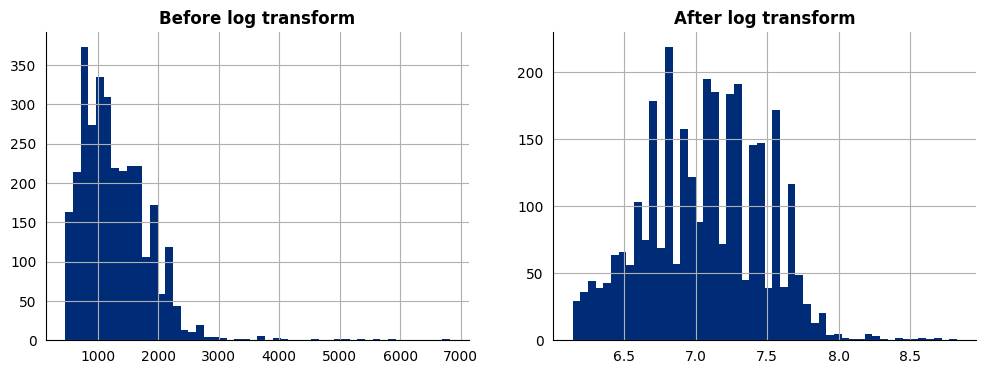

In [7]:
from data_transformations.stateless_transformers import LogTransformer

log = LogTransformer()

log_warranty = log.transform(dataset['WarrantyCost'])

print("Skewness before transform: ", dataset['WarrantyCost'].skew(),
     "\nSkewness after transform: ", log_warranty.skew());

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.set_title('Before log transform')
ax2.set_title('After log transform')
dataset['WarrantyCost'].hist(bins=50, ax=ax1)
log_warranty.hist(bins=50, ax=ax2);

### <code>SqrtTransformer</code>

The squareroot transform is also used for skewed data. However, if the data is <i>left</i> skewed, we use a <b>sqrt(constant - x)</b> or <b>log(constant - x)</b> transform. The value of the constant needs to be chosen such that all the values being transformed are positive:

Skewness before transform:  -0.4553069645902209 
Skewness after transform:  -0.09681085000917572


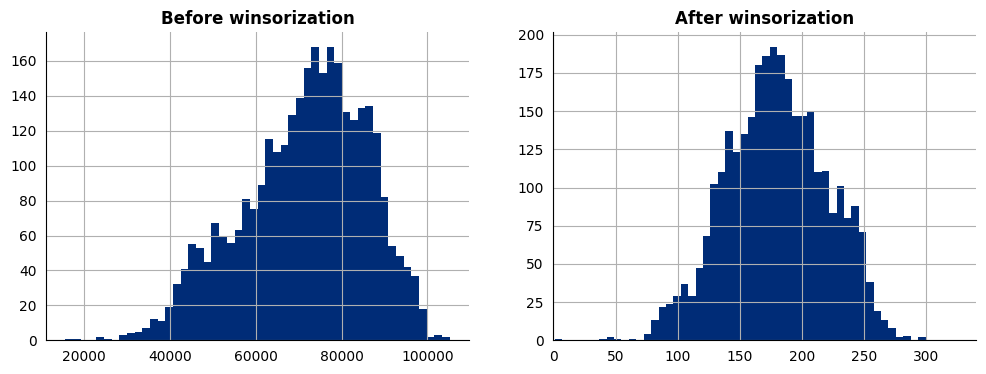

In [8]:
from data_transformations.stateless_transformers import SqrtTransformer

sqrt = SqrtTransformer()
constant = dataset['VehOdo'].max() + 1
sqrt_vehodo = sqrt.transform(constant - dataset['VehOdo'])

print("Skewness before transform: ", dataset['VehOdo'].skew(),
     "\nSkewness after transform: ", sqrt_vehodo.skew());

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.set_title('Before winsorization')
ax2.set_title('After winsorization')
ax2.set_xlim([0,340])
dataset['VehOdo'].hist(bins=50, ax=ax1)
sqrt_vehodo.hist(bins=50, ax=ax2);

# Stateful Transformations

Stateful transformations are transformations where one or more parameters are <i>fitted</i> to the data. Some common examples include 

<ul>
    <li>Standardization e.g. <code>StandardScaler</code></li>
    <li>Scaling to a range e.g. <code>MinMaxScaler</code> and <code>MaxAbsScaler</code></li>
    <li>Categorical encodings e.g. <code>OrdinalEncoder</code> and <code>OneHotEncoder</code></li>
</ul>

<div class="alert alert-info" role="alert">
<p>It is <b>extremely</b> important to apply these transformations correctly when training and testing supervised learning models (e.g. regression/classification models). You should split your data into a training set and a validation (testing) set and fit any stateful transformers to the training data <b>only</b>. Once the transformer has been fitted, it can then be used to transform the training and testing data.</p>
</div>



## Train/test split

The <code>train_test_split</code> function provided by Scikit-learn provides functionality for randomly splitting your dataset into a training set and a testing set:


In [9]:
from sklearn.model_selection import train_test_split

# test_size specifies the percentage of the data reserved for validation
train, test = train_test_split(dataset, test_size=0.25)
print(train.shape, test.shape)

(2340, 19) (781, 19)


If you have a target variable for classification or regression models, you can first split the dataset into independent variables and target variable:

In [10]:
X = dataset.drop('IsBadBuy', axis=1)
y = dataset['IsBadBuy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Categorical stateful transformations

### <code>OrdinalEncoder</code>

OrdinalEncoder enables you to encode categorical data numerically by giving each category an integer value:

In [11]:
from sklearn.preprocessing import OrdinalEncoder

# The transformer needs to be instantiated first
enc = OrdinalEncoder()
# select_dtypes allows you to select all columns of the specified datatypes
X_cat = X.select_dtypes(include=['object'])

pd.DataFrame(enc.fit_transform(X_cat), columns=enc.get_feature_names_out())

,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size
0,326.0,1.0,7.0,17.0,31.0,24.0,83.0,14.0,0.0,1.0,3.0,5.0
1,70.0,2.0,9.0,4.0,403.0,53.0,119.0,13.0,0.0,0.0,0.0,5.0
2,156.0,1.0,7.0,1.0,417.0,33.0,172.0,13.0,0.0,0.0,0.0,6.0
3,23.0,0.0,3.0,11.0,306.0,37.0,106.0,12.0,0.0,1.0,2.0,5.0
4,292.0,2.0,0.0,2.0,362.0,37.0,53.0,2.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3116,51.0,1.0,4.0,1.0,70.0,33.0,93.0,14.0,0.0,1.0,0.0,0.0
3117,431.0,1.0,5.0,4.0,151.0,76.0,280.0,4.0,0.0,1.0,0.0,4.0
3118,153.0,1.0,2.0,19.0,186.0,5.0,53.0,12.0,0.0,0.0,0.0,5.0
3119,151.0,1.0,2.0,2.0,362.0,5.0,53.0,2.0,0.0,1.0,0.0,5.0


If using a train/test split, you should fit and transform the training data, but only transform the test data. You might encounter new values in the test dataset, which you can handle with the <code>handle_unknown</code> and <code>unknown_value</code> parameters:

In [12]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# We will assume all object type columns are categorical variables.
# This is not necessarily the case, and you should always check.
X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])

X_train_cat_t = enc.fit_transform(X_train_cat)
X_test_cat_t = enc.transform(X_test_cat) 

pd.DataFrame(X_test_cat_t, columns=enc.get_feature_names_out())

,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size
0,83.0,1.0,7.0,4.0,301.0,67.0,-1.0,14.0,1.0,0.0,0.0,8.0
1,98.0,1.0,3.0,3.0,0.0,54.0,280.0,14.0,0.0,0.0,0.0,4.0
2,110.0,2.0,1.0,6.0,-1.0,33.0,98.0,6.0,0.0,1.0,3.0,0.0
3,220.0,1.0,6.0,7.0,12.0,24.0,20.0,13.0,1.0,1.0,2.0,0.0
4,125.0,1.0,3.0,4.0,118.0,68.0,30.0,13.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
776,21.0,2.0,7.0,4.0,150.0,44.0,102.0,4.0,0.0,1.0,0.0,0.0
777,316.0,0.0,4.0,1.0,236.0,29.0,83.0,6.0,0.0,0.0,0.0,5.0
778,357.0,2.0,3.0,1.0,228.0,30.0,88.0,1.0,0.0,1.0,0.0,5.0
779,324.0,1.0,5.0,10.0,221.0,36.0,185.0,4.0,0.0,0.0,0.0,7.0


### <code>OneHotEncoder</code>

OneHotEncoder (a.k.a. dummy variables) is the more commonly used transformer for categorical variables, as it does not assume any ordering/priority of the categorical values:

In [13]:
from sklearn.preprocessing import OneHotEncoder

# The transformer needs to be instantiated first
enc = OneHotEncoder(sparse_output=False)

# Fit to the training data and transform it, but transform only for the test data
X_train_cat_t = pd.DataFrame(enc.fit_transform(X_train_cat),
                             columns=enc.get_feature_names_out(X_cat.columns))
X_test_cat_t = pd.DataFrame(enc.fit_transform(X_test_cat),
                             columns=enc.get_feature_names_out(X_cat.columns))

X_test_cat_t

,PurchDate_1/13/2009,PurchDate_1/13/2010,PurchDate_1/14/2010,PurchDate_1/19/2010,PurchDate_1/20/2009,PurchDate_1/20/2010,PurchDate_1/21/2009,PurchDate_1/21/2010,PurchDate_1/22/2009,PurchDate_1/22/2010,...,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Several models have issues with perfectly collinear variables, and thus one of each of the categories should be dropped when creating the dummy variables using the <code>drop</code> argument:

In [14]:
# The transformer needs to be instantiated first
enc = OneHotEncoder(sparse_output=False, drop='first')

# Fit to the training data and transform it, but transform only for the test data
X_train_cat_t = pd.DataFrame(enc.fit_transform(X_train_cat),
                             columns=enc.get_feature_names_out(X_cat.columns))
X_test_cat_t = pd.DataFrame(enc.fit_transform(X_test_cat),
                             columns=enc.get_feature_names_out(X_cat.columns))

X_test_cat_t

,PurchDate_1/13/2010,PurchDate_1/14/2010,PurchDate_1/19/2010,PurchDate_1/20/2009,PurchDate_1/20/2010,PurchDate_1/21/2009,PurchDate_1/21/2010,PurchDate_1/22/2009,PurchDate_1/22/2010,PurchDate_1/25/2010,...,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Numerical stateful transformations

In [15]:
# Select all float and int variables
X_train_num = X_train.select_dtypes(include=['float', 'int'])
X_test_num = X_test.select_dtypes(include=['float', 'int'])

### <code>StandardScaler</code>

Standardization (centering to mean of 0 and scaling to standard deviation of 1) is required by many models, such as regularized regression, principal component analysis and k-means clustering.  

In [16]:
from sklearn.preprocessing import StandardScaler

# The transformer needs to be instantiated first
scaler = StandardScaler()

# Fit to the training data and transform it, but transform only for the test data
X_train_num_t = pd.DataFrame(scaler.fit_transform(X_train_num),
                             columns=scaler.get_feature_names_out(X_train_num.columns))
X_test_num_t = pd.DataFrame(scaler.fit_transform(X_test_num),
                             columns=scaler.get_feature_names_out(X_test_num.columns))

X_test_num_t

,VehYear,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost
0,-2.463340,-0.943081,0.536205,-1.339172,-1.639489,-0.758496
1,0.370880,-0.943081,-0.490201,1.616330,2.031902,-1.408314
2,1.504568,0.980016,-1.325013,1.798763,1.066337,-1.301945
3,-1.896496,0.980016,-0.817703,-1.692513,-1.718081,-0.400709
4,0.370880,-0.943081,1.140484,0.242713,0.403915,-0.538021
...,...,...,...,...,...,...
776,-2.463340,0.980016,0.221247,-1.630509,-2.004382,0.374819
777,-0.762808,-0.943081,0.569768,-0.602284,-0.679538,0.020900
778,0.370880,0.980016,-1.802069,0.346847,0.319709,-0.961564
779,-0.762808,-0.943081,0.771356,0.494702,0.454439,-1.040857


You can access the means and standard deviations calculated when fitting to the training data with the <code>mean_</code> and <code>scale_</code> attributes. They are in the same order as the columns of the input data:

In [17]:
print(scaler.mean_, scaler.scale_, sep=2*'\n')

[2.00534571e+03 1.49039693e+00 7.15007452e+04 6.12033803e+03
 6.73048912e+03 1.26119334e+03]

[1.76415371e+00 5.19994554e-01 1.45098508e+04 2.51598544e+03
 1.78134139e+03 5.17067450e+02]


A better way to represent this information would be to convert to a dataframe and include the variable names:

In [18]:
pd.DataFrame({'Variable': X_train_num.columns,
              'Mean': scaler.mean_,
              'Std dev': scaler.scale_})

,Variable,Mean,Std dev
0,VehYear,2005.345711,1.764154
1,WheelTypeID,1.490397,0.519995
2,VehOdo,71500.745198,14509.850837
3,MMRAcquisitionAuctionAveragePrice,6120.338028,2515.985443
4,VehBCost,6730.489117,1781.341387
5,WarrantyCost,1261.193342,517.067450


### <code>MinMaxScaler</code>

This transformation allows you to scale your data to a given range (from 0 to 1 by default):

In [19]:
from sklearn.preprocessing import MinMaxScaler

# You can specify the range with the "feature_range" argument
mm_scaler = MinMaxScaler(feature_range=(0, 10))

# Fit to the training data and transform it, but transform only for the test data
X_train_num_t = pd.DataFrame(mm_scaler.fit_transform(X_train_num),
                             columns=mm_scaler.get_feature_names_out(X_train_num.columns))
X_test_num_t = pd.DataFrame(mm_scaler.fit_transform(X_test_num),
                             columns=mm_scaler.get_feature_names_out(X_test_num.columns))

X_test_num_t

,VehYear,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost
0,0.00,0.0,6.782053,1.607832,2.109827,0.754239
1,6.25,0.0,4.765097,5.953828,8.410405,0.099396
2,8.75,5.0,3.124636,6.222092,6.753372,0.206587
3,1.25,5.0,4.121535,1.088252,1.974952,1.114792
4,6.25,0.0,7.969501,3.933957,5.616570,0.976418
...,...,...,...,...,...,...
776,0.00,5.0,6.163139,1.179427,1.483622,1.896317
777,3.75,0.0,6.848007,2.691409,3.757225,1.539661
778,6.25,5.0,2.187191,4.087084,5.472062,0.549600
779,3.75,0.0,7.244139,4.304500,5.703276,0.469694


### <code>MaxAbsScaler</code>

This transformer scales each feature by it's maximum absolute value such that the maximum absolute value of each feature of the transformed data will by 1. It does not shift or center the data, so negative values will remain negative.

In [20]:
from sklearn.preprocessing import MaxAbsScaler

ma_scaler = MaxAbsScaler()

# Fit to the training data and transform it, but transform only for the test data
X_train_num_t = pd.DataFrame(ma_scaler.fit_transform(X_train_num),
                             columns=ma_scaler.get_feature_names_out(X_train_num.columns))
X_test_num_t = pd.DataFrame(ma_scaler.fit_transform(X_test_num),
                             columns=ma_scaler.get_feature_names_out(X_test_num.columns))

X_test_num_t

,VehYear,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost
0,0.996018,0.333333,0.769405,0.160783,0.317500,0.154819
1,0.998507,0.333333,0.624871,0.595383,0.862500,0.094958
2,0.999502,0.666667,0.507317,0.622209,0.719167,0.104757
3,0.996516,0.666667,0.578754,0.108825,0.305833,0.187778
4,0.998507,0.333333,0.854496,0.393396,0.620833,0.175129
...,...,...,...,...,...,...
776,0.996018,0.666667,0.725054,0.117943,0.263333,0.259220
777,0.997511,0.333333,0.774131,0.269141,0.460000,0.226617
778,0.998507,0.666667,0.440141,0.408708,0.608333,0.136113
779,0.997511,0.333333,0.802517,0.430450,0.628333,0.128808


### <code>Winsorization</code>

Winsorization is an approach to dealing with outliers which replaces the all the extreme values with a specified percentile of the data. You can import it from the utilities folder in your project folder:

In [21]:
from data_transformations.winsorize_transformer import WinsorizationTransformer

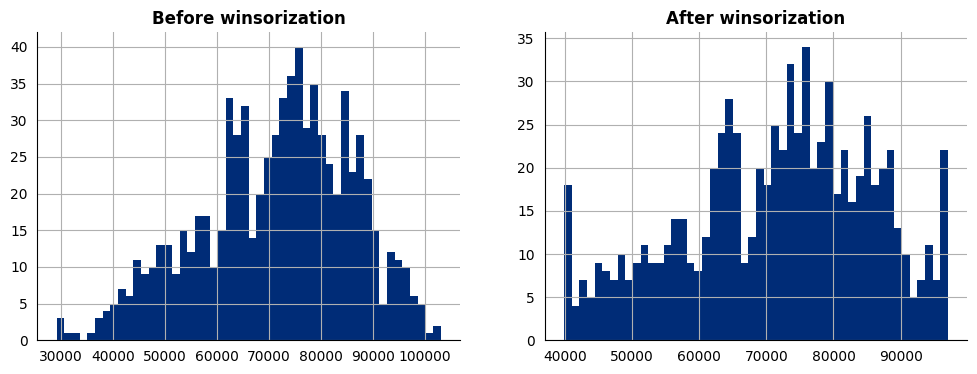

In [22]:
# You need to specify the cut off at each tail. 0.02 corresponds to 2%
wins = WinsorizationTransformer(lower_lim = 0.02, upper_lim = 0.02)

# Fit to the training data and transform it, but transform only for the test data
X_train_num_t = pd.DataFrame(wins.fit_transform(X_train_num),
                             columns=wins.get_feature_names_out(X_train_num.columns))
X_test_num_t = pd.DataFrame(wins.fit_transform(X_test_num),
                             columns=wins.get_feature_names_out(X_test_num.columns))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.set_title('Before winsorization')
ax2.set_title('After winsorization')
X_test_num['VehOdo'].hist(bins=50, ax=ax1)
X_test_num_t['VehOdo'].hist(bins=50, ax=ax2);

Like the other transformers, you can access the fitted parameters through attributes:

In [23]:
pd.DataFrame({'Column':X_train_num.columns,
             'Lower Percentile': wins.lower_percentile_,
             'Upper Percentile': wins.upper_percentile_})

,Column,Lower Percentile,Upper Percentile
0,VehYear,2001.0,2008.0
1,WheelTypeID,1.0,2.0
2,VehOdo,39870.0,97068.0
3,MMRAcquisitionAuctionAveragePrice,1884.0,11412.0
4,VehBCost,3465.0,10680.0
5,WarrantyCost,505.0,2351.0


# Pipelines

When using preprocessing transformations like the ones demonstrated above, and especially when multiple transforms are being applied to a single dataset, it is common to use Scikit-learn <b>Pipelines</b>. Pipelines allow you to concatenate multiple transformers and models into a single Python object which can be fit to data in a single line of code. To learn more about Scikit-learn pipelines, see the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">here</a>.

[Table of contents](#Preprocessing-transformations)